In [1]:
setwd('/import/DB/zhang/bulk/')

In [2]:
load('data1.rda')

In [3]:
count = read.table('TARGET-OS.htseq_fpkm.tsv',header =T,sep = '\t',check.names = F)

In [4]:
library("biomaRt")

Warning message:
"package 'biomaRt' was built under R version 4.2.2"


In [5]:
head(count,2)

,Ensembl_ID,TARGET-40-PASUUH-01A,TARGET-40-PAUTWB-01A,TARGET-40-PAKUZU-01A,TARGET-40-0A4I0S-01A,TARGET-40-PARJXU-01A,TARGET-40-PAPWWC-01A,TARGET-40-PAUUML-01A,TARGET-40-PAMHLF-01A,TARGET-40-PAUBIT-01A,...,TARGET-40-PAKXLD-01A,TARGET-40-PASSLM-01A,TARGET-40-PAMTCM-01A,TARGET-40-0A4HY5-01A,TARGET-40-PAVALD-01A,TARGET-40-0A4I8U-01A,TARGET-40-0A4I9K-01A,TARGET-40-0A4I3S-01A,TARGET-40-PANVJJ-01A,TARGET-40-0A4I5B-01A
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003.13,3.339209,3.74492531,3.157286,2.01453383,2.92383375,4.3706177,2.263906,3.083911,2.87676249,...,3.220717,3.879931,3.071625,2.52654462,2.391355,3.7881845,3.976208,4.20971849,4.10269172,2.9930765
2,ENSG00000000005.5,0.165301,0.07806326,0.000000,0.02034218,0.06253622,0.1880211,0.000000,0.000000,0.01606837,...,0.202261,0.000000,0.000000,0.01991537,0.000000,0.4380799,0.000000,0.04977015,0.03745251,0.1908045


In [6]:
library(stringr)

Warning message:
"package 'stringr' was built under R version 4.2.3"


In [7]:
count$ensemble_id=unlist(str_split(count$Ensembl_ID,"[.]",simplify=T))[,1]

In [8]:
count$Ensembl_ID  = count$ensemble_id

In [9]:
count = count[,-90]

In [10]:
head(count,2)

,Ensembl_ID,TARGET-40-PASUUH-01A,TARGET-40-PAUTWB-01A,TARGET-40-PAKUZU-01A,TARGET-40-0A4I0S-01A,TARGET-40-PARJXU-01A,TARGET-40-PAPWWC-01A,TARGET-40-PAUUML-01A,TARGET-40-PAMHLF-01A,TARGET-40-PAUBIT-01A,...,TARGET-40-PAKXLD-01A,TARGET-40-PASSLM-01A,TARGET-40-PAMTCM-01A,TARGET-40-0A4HY5-01A,TARGET-40-PAVALD-01A,TARGET-40-0A4I8U-01A,TARGET-40-0A4I9K-01A,TARGET-40-0A4I3S-01A,TARGET-40-PANVJJ-01A,TARGET-40-0A4I5B-01A
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003,3.339209,3.74492531,3.157286,2.01453383,2.92383375,4.3706177,2.263906,3.083911,2.87676249,...,3.220717,3.879931,3.071625,2.52654462,2.391355,3.7881845,3.976208,4.20971849,4.10269172,2.9930765
2,ENSG00000000005,0.165301,0.07806326,0.000000,0.02034218,0.06253622,0.1880211,0.000000,0.000000,0.01606837,...,0.202261,0.000000,0.000000,0.01991537,0.000000,0.4380799,0.000000,0.04977015,0.03745251,0.1908045


In [11]:
library(org.Hs.eg.db)

Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Warning message:
"package 'Biobase' was built under R version 4.2.3"
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor,

In [12]:
k=keys(org.Hs.eg.db,keytype = "ENSEMBL")

In [13]:
list=select(org.Hs.eg.db,keys=k,columns = c("SYMBOL"), keytype="ENSEMBL")

'select()' returned 1:many mapping between keys and columns



In [14]:
exp = merge(list,count,by.x = 'ENSEMBL',by.y = 'Ensembl_ID')

In [15]:
exp = na.omit(exp)

In [16]:
exp = exp[!duplicated(exp$SYMBOL),]

In [17]:
rownames(exp) = exp$SYMBOL

In [18]:
exp = exp[,-c(1,2)]

In [19]:
dim(exp)

[1] 35302    88

In [35]:
head(exp,2)

,TARGET-40-PASUUH-01A,TARGET-40-PAUTWB-01A,TARGET-40-PAKUZU-01A,TARGET-40-0A4I0S-01A,TARGET-40-PARJXU-01A,TARGET-40-PAPWWC-01A,TARGET-40-PAUUML-01A,TARGET-40-PAMHLF-01A,TARGET-40-PAUBIT-01A,TARGET-40-PASFCV-01A,...,TARGET-40-PAKXLD-01A,TARGET-40-PASSLM-01A,TARGET-40-PAMTCM-01A,TARGET-40-0A4HY5-01A,TARGET-40-PAVALD-01A,TARGET-40-0A4I8U-01A,TARGET-40-0A4I9K-01A,TARGET-40-0A4I3S-01A,TARGET-40-PANVJJ-01A,TARGET-40-0A4I5B-01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,3.339209,3.74492531,3.157286,2.01453383,2.92383375,4.3706177,2.263906,3.083911,2.87676249,3.47017240,...,3.220717,3.879931,3.071625,2.52654462,2.391355,3.7881845,3.976208,4.20971849,4.10269172,2.9930765
TNMD,0.165301,0.07806326,0.000000,0.02034218,0.06253622,0.1880211,0.000000,0.000000,0.01606837,0.02034218,...,0.202261,0.000000,0.000000,0.01991537,0.000000,0.4380799,0.000000,0.04977015,0.03745251,0.1908045


In [40]:
nmfinput = exp[colnames(data1),]

In [41]:
library(NMF)

Loading required package: registry

Warning message:
"package 'registry' was built under R version 4.2.3"
Loading required package: rngtools

Warning message:
"package 'rngtools' was built under R version 4.2.3"
Loading required package: cluster

Warning message:
"package 'cluster' was built under R version 4.2.3"
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')


Attaching package: 'NMF'


The following object is masked from 'package:S4Vectors':

    nrun




In [42]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[85] FALSE FALSE FALSE FALSE

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 5 rows containing missing values (`geom_point()`)."


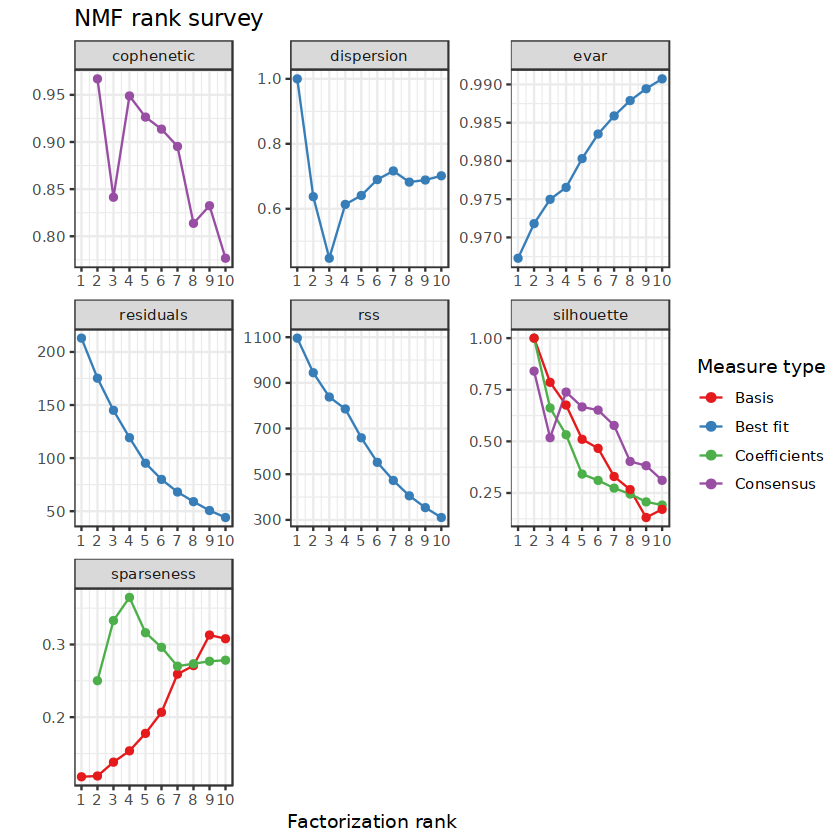

In [43]:
plot(estim.coad)

In [44]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
28 60 

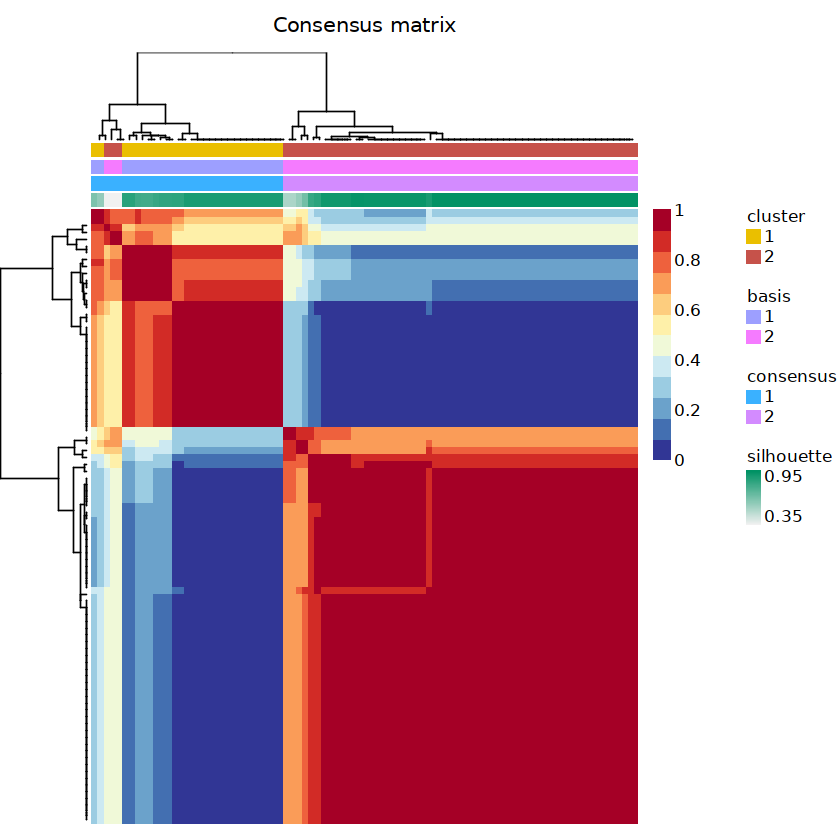

In [45]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [20]:
exp1 = exp %>% t() %>% as.data.frame()

Warning message:
"package 'ggstatsplot' was built under R version 4.2.3"
You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

Registered S3 method overwritten by 'ggside':
  method from   
  +.gg   ggplot2

`stat_xsidebin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with `binwidth`.


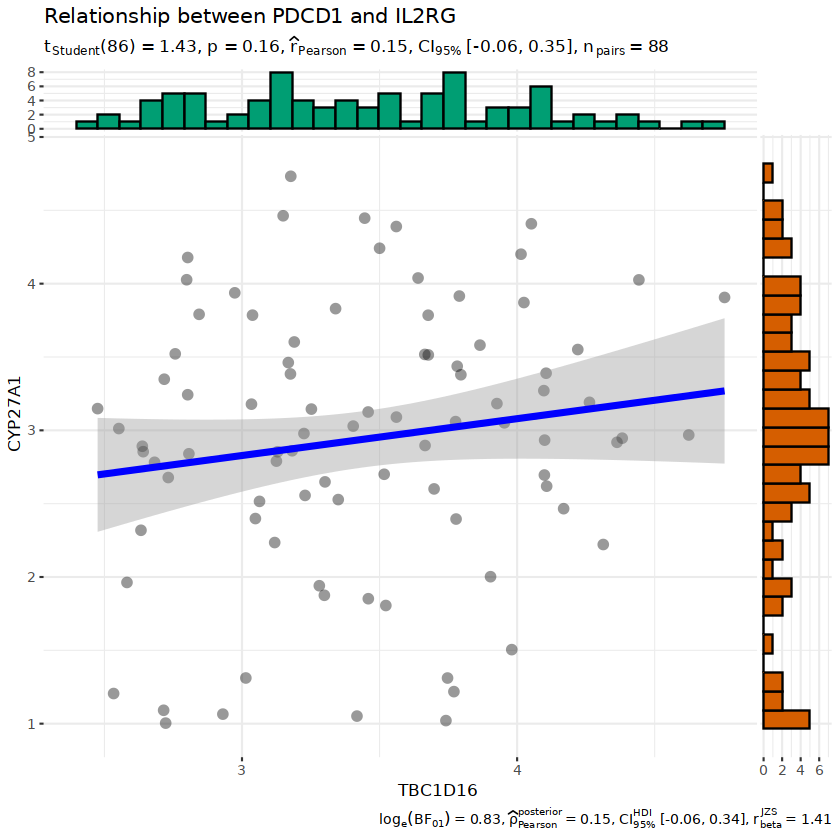

In [21]:
library(ggstatsplot)

ggscatterstats(data = exp1,
              y = CYP27A1,
              x = TBC1D16,
              centrality.para = "mean",                              
              margins = "both",                                        
              xfill = "#CC79A7",
              yfill = "#009E73",
              marginal.type = "histogram",
              title = "Relationship between PDCD1 and IL2RG")